<h2> INDIAN FOOD IMAGE CLASSIFICATION <h2>

In [3]:
import os
import cv2
import keras
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.models import Sequential
from sklearn.metrics import classification_report,confusion_matrix
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout

<b> LOADING THE DATASET AND PREPARING FOR TRAINING <b>

In [4]:
categories = os.listdir('/content/drive/MyDrive/Colab Notebooks/food20dataset/test_set')

img_size = 256
def get_data(data_dir):
    data = [] 
    for category in categories: 
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img)) #[...,::-1] #convert BGR to RGB format #optional
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) #reshape
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

train = get_data('/content/drive/MyDrive/Colab Notebooks/food20dataset/train_set')
val = get_data('/content/drive/MyDrive/Colab Notebooks/food20dataset/test_set')

x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


In [5]:
''' TRAINING THE IMAGES ON A CUSTOM CNN MODEL '''
model = Sequential()
model.add(Conv2D(128,3,padding="same", activation="relu", input_shape=(256,256,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dense(20, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      36896     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        3

In [6]:
opt = Adam(lr=0.0001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])
history = model.fit(x_train,y_train,epochs = 50, validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


27/27 [==============================] - 49s 178ms/step - loss: 2.8470 - accuracy: 0.0765 - val_loss: 2.5226 - val_accuracy: 0.0833
Epoch 2/50
27/27 [==============================] - 3s 128ms/step - loss: 2.5172 - accuracy: 0.1166 - val_loss: 2.4129 - val_accuracy: 0.1917
Epoch 3/50
27/27 [==============================] - 3s 129ms/step - loss: 2.3749 - accuracy: 0.1897 - val_loss: 2.2417 - val_accuracy: 0.2083
Epoch 4/50
27/27 [==============================] - 4s 130ms/step - loss: 2.1678 - accuracy: 0.2375 - val_loss: 2.1179 - val_accuracy: 0.2694
Epoch 5/50
27/27 [==============================] - 4s 130ms/step - loss: 2.1377 - accuracy: 0.2608 - val_loss: 2.0386 - val_accuracy: 0.2528
Epoch 6/50
27/27 [==============================] - 3s 130ms/step - loss: 1.9154 - accuracy: 0.3862 - val_loss: 1.9714 - val_accuracy: 0.3139
Epoch 7/50
27/27 [==============================] - 3s 130ms/step - loss: 1.7573 - accuracy: 0.4471 - val_loss: 1.9126 - val_accuracy: 0.3167
Epoch 8/50
27/27

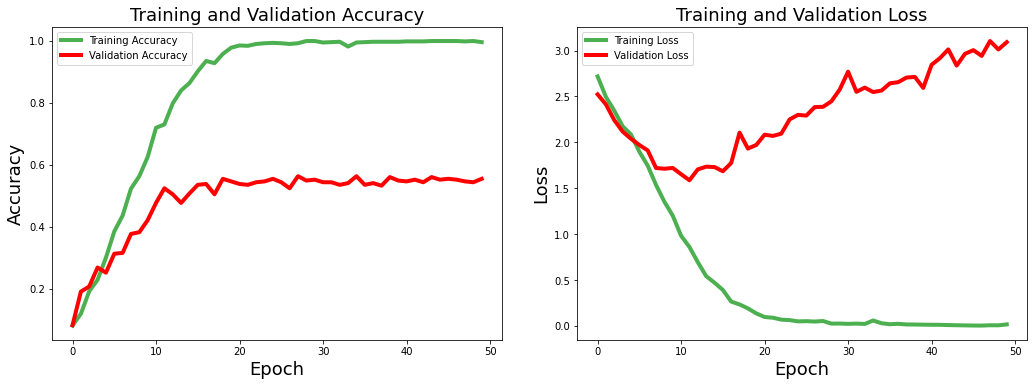

In [7]:
# Validating the models performance
epochs_range = range(50)
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
# plotting the accuracy and loss graphs
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='Validation Accuracy', c='red', linewidth=4)
ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='Validation Loss', c='red', linewidth=4)
ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [8]:
#classification report
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_val, predictions, target_names = categories))

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        upma       0.46      0.60      0.52        30
      samosa       0.62      0.43      0.51        30
       poori       0.80      0.53      0.64        30
     noodles       0.56      0.73      0.64        30
      dhokla       0.70      0.87      0.78        30
       chaat       0.63      0.63      0.63        30
        idly       0.58      0.83      0.68        30
bisibelebath       0.39      0.40      0.39        30
  butternaan       0.55      0.20      0.29        30
    biriyani       0.41      0.40      0.41        30
        dosa       0.30      0.30      0.30        30
    chappati       0.73      0.73      0.73        30

    accuracy                           0.56       360
   macro avg       0.56      0.56      0.54       360
weighted avg       0.56      0.56      0.54       360



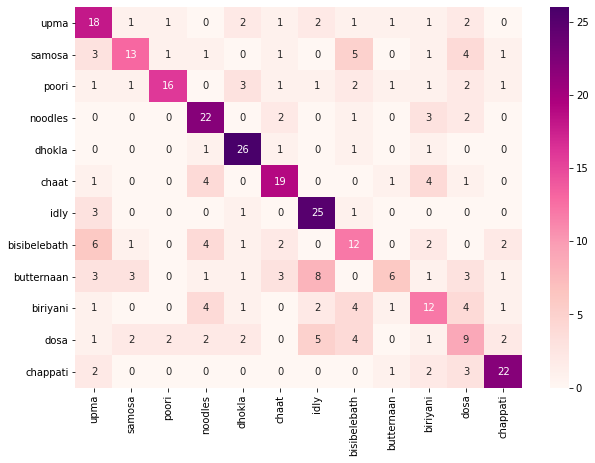

In [9]:
#confusion matrix for cnn model
cm1 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm1, index = [i for i in categories], columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")

<h3> USING TRANSFER LEARNING [MOBILENET] <h3>

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape = (256, 256, 3), include_top = False, weights = "imagenet")
base_model.trainable = False
#defining the model architecture
model = tf.keras.Sequential([base_model, tf.keras.layers.GlobalAveragePooling2D(), tf.keras.layers.Dropout(0.2), tf.keras.layers.Dense(20, activation="softmax")])
model.summary()

In [ ]:
#training the mobilenet model
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history1 = model.fit(x_train,y_train,epochs = 50 , validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


27/27 [==============================] - 6s 115ms/step - loss: 3.3184 - accuracy: 0.0595 - val_loss: 2.9145 - val_accuracy: 0.0917
Epoch 2/50
27/27 [==============================] - 2s 76ms/step - loss: 2.7876 - accuracy: 0.1250 - val_loss: 2.6184 - val_accuracy: 0.1444
Epoch 3/50
27/27 [==============================] - 2s 76ms/step - loss: 2.5515 - accuracy: 0.1690 - val_loss: 2.4386 - val_accuracy: 0.1722
Epoch 4/50
27/27 [==============================] - 2s 76ms/step - loss: 2.3524 - accuracy: 0.2214 - val_loss: 2.2917 - val_accuracy: 0.2028
Epoch 5/50
27/27 [==============================] - 2s 77ms/step - loss: 2.2023 - accuracy: 0.2810 - val_loss: 2.1625 - val_accuracy: 0.2750
Epoch 6/50
27/27 [==============================] - 2s 76ms/step - loss: 2.0781 - accuracy: 0.3202 - val_loss: 2.0490 - val_accuracy: 0.3389
Epoch 7/50
27/27 [==============================] - 2s 77ms/step - loss: 1.9335 - accuracy: 0.3762 - val_loss: 1.9485 - val_accuracy: 0.3833
Epoch 8/50
27/27 [=====

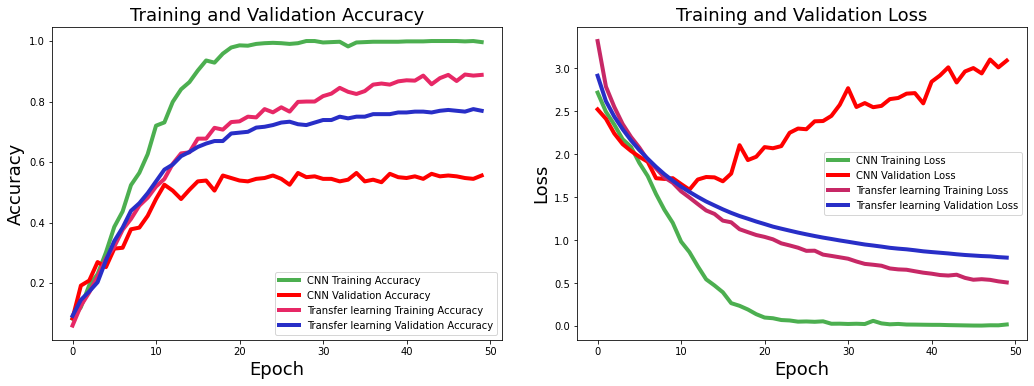

In [ ]:
#validating the MOBILENET model 
epochs_range = range(50)
acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
# plotting accuracy and loss of both models for comparison
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))
plt.rc('xtick', labelsize=10)    # fontsize of the tick labels
plt.rc('ytick', labelsize=10)
ax1.plot(epochs_range, acc, label='CNN Training Accuracy', c = '#4CAF50', linewidth=4)
ax1.plot(epochs_range, val_acc, label='CNN Validation Accuracy', c='red', linewidth=4)
ax1.plot(epochs_range, acc1, label='Transfer learning Training Accuracy', c = '#e72866', linewidth=4)
ax1.plot(epochs_range, val_acc1, label='Transfer learning Validation Accuracy', c='#282ec7', linewidth=4)

ax1.legend()
ax1.set_title('Training and Validation Accuracy',fontsize=18)
ax1.set_ylabel('Accuracy',fontsize=18)
ax1.set_xlabel('Epoch',fontsize=18)

ax2.plot(epochs_range, loss, label='CNN Training Loss',c = '#4CAF50', linewidth=4)
ax2.plot(epochs_range, val_loss, label='CNN Validation Loss', c='red', linewidth=4)
ax2.plot(epochs_range, loss1, label='Transfer learning Training Loss',c = '#c72866', linewidth=4)
ax2.plot(epochs_range, val_loss1, label='Transfer learning Validation Loss', c='#282ec7', linewidth=4)

ax2.legend()
ax2.set_title('Training and Validation Loss',fontsize=18)
ax2.set_ylabel('Loss',fontsize=18)
ax2.set_xlabel('Epoch',fontsize=18)
fig.tight_layout(pad=3.0)
plt.show()

In [ ]:
# classification report of mobilenet model
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]
print(classification_report(y_val, predictions, target_names = categories))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        upma       0.59      0.63      0.61        30
      samosa       0.88      0.77      0.82        30
       poori       0.90      0.93      0.92        30
     noodles       0.93      0.93      0.93        30
      dhokla       0.75      0.90      0.82        30
       chaat       0.46      0.73      0.56        30
        idly       0.89      0.83      0.86        30
bisibelebath       0.71      0.40      0.51        30
  butternaan       0.80      0.80      0.80        30
    biriyani       0.81      0.73      0.77        30
        dosa       0.88      0.77      0.82        30
    chappati       0.83      0.80      0.81        30

    accuracy                           0.77       360
   macro avg       0.79      0.77      0.77       360
weighted avg       0.79      0.77      0.77       360



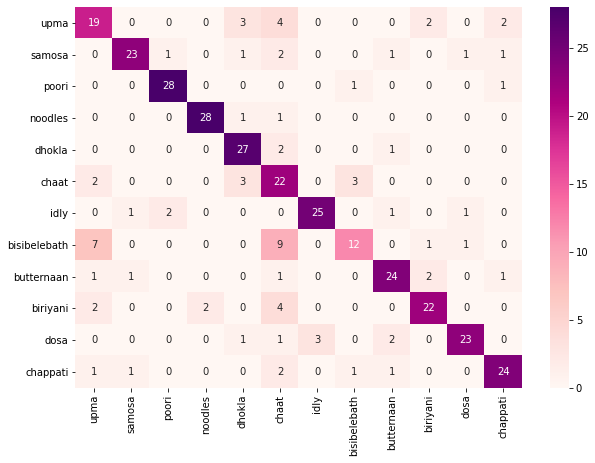

In [ ]:
#confusion matrix of mobilenet model
cm2 = confusion_matrix(y_val, predictions)
df_cm = pd.DataFrame(cm2, index = [i for i in categories],columns = [i for i in categories])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,cmap="RdPu")